In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

arrhythmia_data = pd.read_csv('arrhythmia.data')
print(arrhythmia_data)
'''
1) demonstrate k-means clustering using the scikit learn package (50 points).... 
Calculate the sum of least square error for each different values of 'k'.
 
2) Using Matplotlib determine the optimal number of clusters (k) using the 
elbow method along with a brief explanation (50 points) . 

3) Finally plot the optimal clusters with their centroids along with a brief 
explanation (50 points). 

Comment your code as needed.'''

     75  0  190  80   91  193  371  174  121  -16  ... 0.0.38   9.0  -0.9  \
0    56  1  165  64   81  174  401  149   39   25  ...    0.0   8.5   0.0   
1    54  0  172  95  138  163  386  185  102   96  ...    0.0   9.5  -2.4   
2    55  0  175  94  100  202  380  179  143   28  ...    0.0  12.2  -2.2   
3    75  0  190  80   88  181  360  177  103  -16  ...    0.0  13.1  -3.6   
4    13  0  169  51  100  167  321  174   91  107  ...   -0.6  12.2  -2.8   
..   .. ..  ...  ..  ...  ...  ...  ...  ...  ...  ...    ...   ...   ...   
446  53  1  160  70   80  199  382  154  117  -37  ...    0.0   4.3  -5.0   
447  37  0  190  85  100  137  361  201   73   86  ...    0.0  15.6  -1.6   
448  36  0  166  68  108  176  365  194  116  -85  ...    0.0  16.3 -28.6   
449  32  1  155  55   93  106  386  218   63   54  ...   -0.4  12.0  -0.7   
450  78  1  160  70   79  127  364  138   78   28  ...    0.0  10.4  -1.8   

    0.0.39 0.0.40  0.9.2  2.9.1  23.3  49.4   8  
0      0.0    0.0    0.2 

"\n1) demonstrate k-means clustering using the scikit learn package (50 points).... \nCalculate the sum of least square error for each different values of 'k'.\n \n2) Using Matplotlib determine the optimal number of clusters (k) using the \nelbow method along with a brief explanation (50 points) . \n\n3) Finally plot the optimal clusters with their centroids along with a brief \nexplanation (50 points). \n\nComment your code as needed."

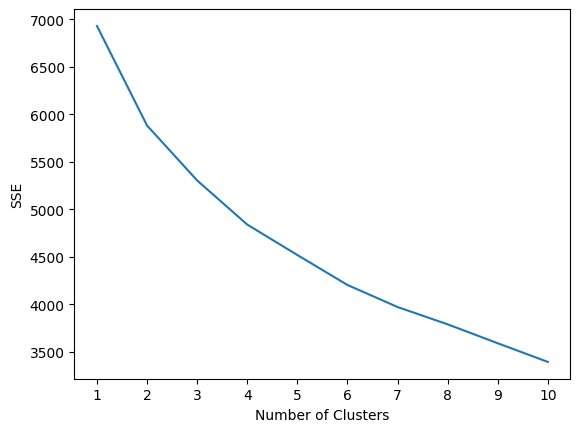

InvalidIndexError: (slice(None, None, None), 0)

In [50]:
#There are column/row values containing string '?', replace with NaN, and drop.
arrhythmia_data = arrhythmia_data.replace('?',np.nan)
arrhythmia_data = arrhythmia_data.dropna()

#Scale for clustering
scaled_arrhythmia_data = StandardScaler().fit_transform(arrhythmia_data)
#check to see if scaling worked
#print(scaled_arrhythmia_data[:5])

#Set kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#Create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_arrhythmia_data)
    sse.append(kmeans.inertia_)
    
#Visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Okay so it looks like 4 clusters is about where the "elbow" is.

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_arrhythmia_data)

#view cluster assignments for each observation
kmeans.labels_

# plot
plt.scatter(
   arrhythmia_data[:, 0], arrhythmia_data[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

#print(arrhythmia_data)
#arrhythmia_km = km.fit_predict(arrhythmia_data)
#It worked this time!

# Let's plot the clusters